In [2]:
import numpy as np
import matplotlib.pyplot as plt
from imp import reload
import sys
sys.path.insert(0, '..')
import utilities as ut

In [3]:
from skimage import img_as_float

In [4]:
hst = img_as_float(ut.read_hyperstack('data/wt_gbe_20180110.h5'))

In [5]:
img = hst[0,350:500,100:900]

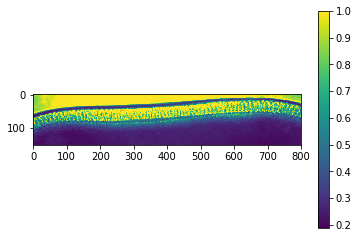

In [6]:
ut.imshow(img)

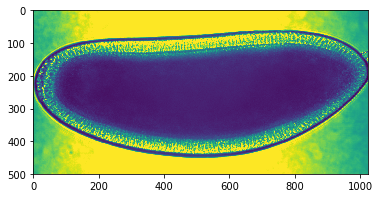

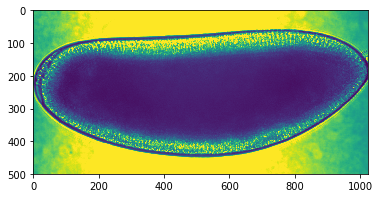

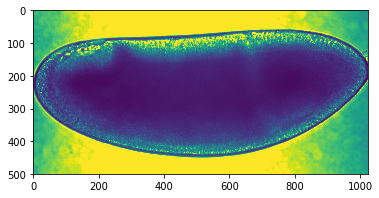

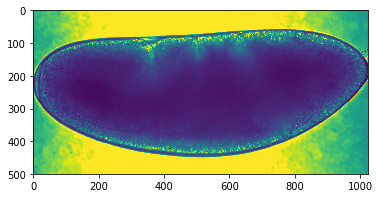

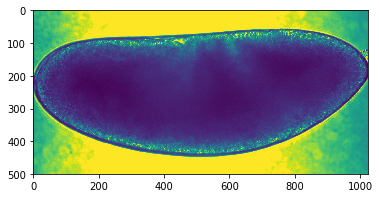

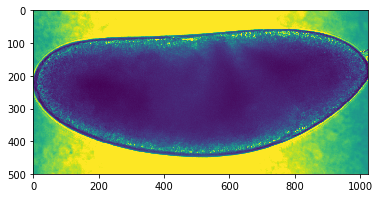

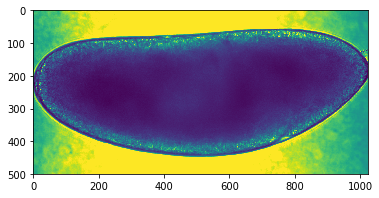

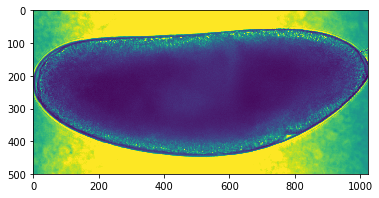

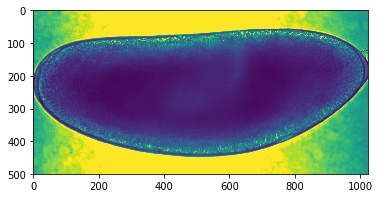

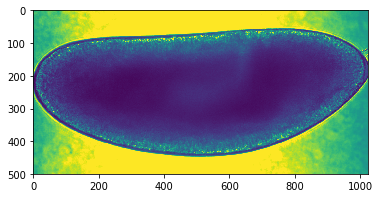

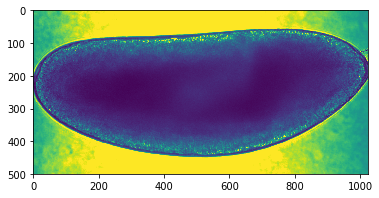

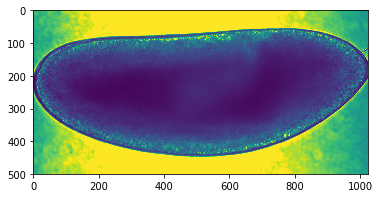

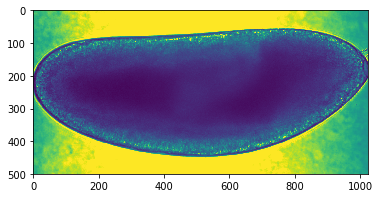

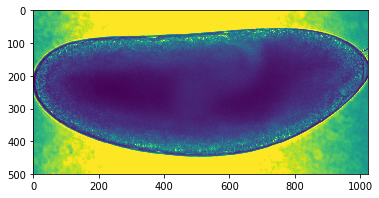

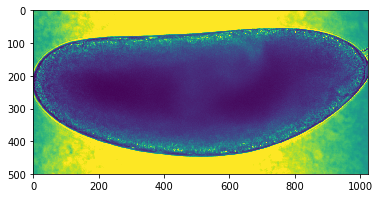

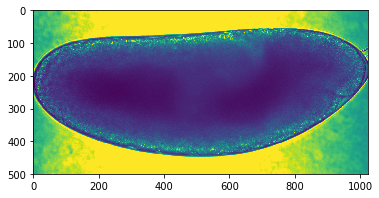

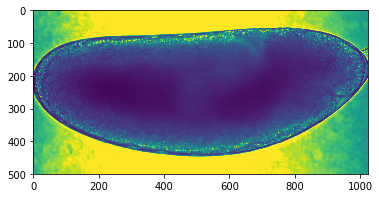

In [16]:
for i in range(0,166,10):
    fig,ax = plt.subplots()
    ax.imshow(hst[i,300:800,:])

# Edge detection

In [7]:
from skimage import filters

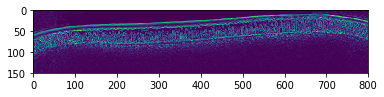

In [8]:
sobel = filters.sobel(img)
plt.imshow(sobel)

In [1]:
blurred = filters.gaussian(sobel,sigma=1.5)
ut.imshow(blurred)

NameError: name 'filters' is not defined

(22871, 2)

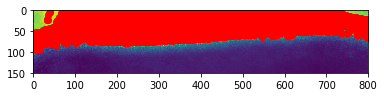

In [10]:
light_spots = np.array((img > 0.9999).nonzero()).T
plt.scatter(light_spots[:,1],light_spots[:,0],c='r')
plt.imshow(img)
light_spots.shape

(46268, 2)

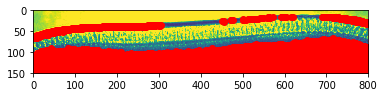

In [11]:
dark_spots = np.array((img<0.3).nonzero()).T
plt.scatter(dark_spots[:,1],dark_spots[:,0],c='red')
plt.imshow(img)
dark_spots.shape

In [12]:
from scipy import ndimage as ndi
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

753

/Users/Morgan/anaconda3/lib/python3.7/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


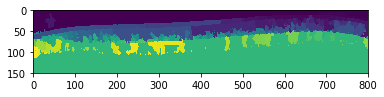

In [13]:
from skimage import morphology
ws = morphology.watershed(blurred,seed_mask)
plt.imshow(ws)

In [14]:
seed_mask = np.zeros(img.shape,dtype=np.int)
seed_mask[15,100] = 1
seed_mask[55,200] = 2

/Users/Morgan/anaconda3/lib/python3.7/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


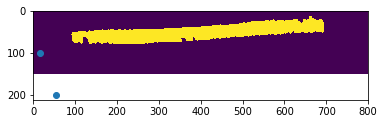

In [15]:
ws = morphology.watershed(blurred,seed_mask)
plt.imshow(ws)
plt.scatter([15,55],[100,200])

http://flothesof.github.io/removing-background-scikit-image.html